## Use Augmentor to make variations of cropped tag

In [18]:
# !pip install Augmentorb

In [13]:
import Augmentor

# Create a pipeline and explicitly add the image directory
p = Augmentor.Pipeline(r"C:\Users\ruyit\Pictures\Tag0")

# Apply augmentations
p.rotate(probability=0.7, max_left_rotation=15, max_right_rotation=15)
p.zoom_random(probability=0.5, percentage_area=0.8)
p.flip_left_right(probability=0.5)
p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)

# Generate 100 augmented images
p.sample(100)

Initialised with 5 image(s) found.
Output directory set to C:\Users\ruyit\Pictures\Tag0\output.

Processing <PIL.Image.Image image mode=RGBA size=128x88 at 0x20BB368E790>: 100%|██████████| 100/100 [00:00<00:00, 286.03 Samples/s]               


In [15]:
# !pip install labelImg

In [20]:
# !pip install pyqt5
# !pip install lxml
# !pip install pillow

## Use LabelImg to draw bounding box
**Note:** <br>
Cannot use labelImg in Jupyter notebook. Need to use terminal/PowerShell <br>
Terminal is opened (press Windows+R, and then type cmd)<br>
Need to install Python [(Python Link)](https://www.python.org/downloads/) and Visual C++ Build Tools [(VCBT Link)](https://visualstudio.microsoft.com/visual-cpp-build-tools/) 

## Visualizing bounding box drawn

In [2]:
# !pip install opencv-python matplotlib

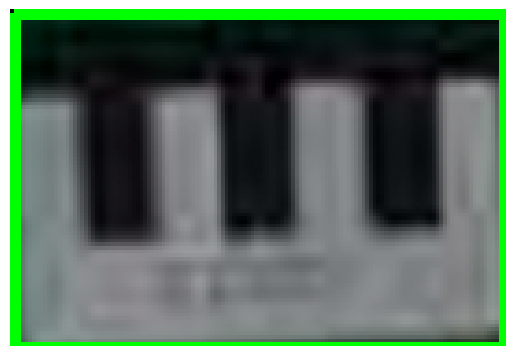

In [2]:
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Example path to images and XML files
image_path = r"C:\Users\ruyit\Pictures\Tag0\output\Tag0_original_Screenshot 2024-11-07 200240.png_0f7ae63a-c00b-4de9-a2d9-e8cb1d86c82c.png"
xml_path = r"C:\Users\ruyit\Pictures\Tag_bbox\Tag0_original_Screenshot 2024-11-07 200240.png_0f7ae63a-c00b-4de9-a2d9-e8cb1d86c82c.xml"

# Read image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format for displaying

# Parse XML
tree = ET.parse(xml_path)
root = tree.getroot()

# Extract bounding box coordinates
xmin = int(root.find('.//xmin').text)
ymin = int(root.find('.//ymin').text)
xmax = int(root.find('.//xmax').text)
ymax = int(root.find('.//ymax').text)

# Draw bounding box on the image
cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()